# Exploring Activation Functions: Understanding Gated Linear Units and Beyond

In the realm of neural networks, activation functions play a crucial role in shaping the behavior and expressiveness of models. Among the myriad of activation functions, Gated Linear Units (GLU), introduced by Dauphin et al. in 2016, have emerged as an intriguing approach. GLU operates by performing a component-wise product of two linear projections, with one of them being subjected to a sigmoid function. However, the exploration doesn't end there; variations of GLU abound, offering flexibility in the choice of nonlinear or even linear functions in lieu of the sigmoid.

In this notebook, we embark on a journey to delve into the intricacies of these activation functions. We investigate how different variants of GLU fare in the context of feedforward sublayers within the Transformer architecture, a seminal model for sequence-to-sequence tasks introduced by Vaswani et al. in 2017. Our goal is to understand not only the performance but also the nuances and trade-offs associated with these activation functions.

As neural networks continue to evolve and tackle increasingly complex tasks, understanding the choices and implications of activation functions becomes paramount. Join us as we navigate through the landscape of activation functions, uncovering insights that shed light on their significance in modern deep learning.

# What makes a good activation function?
- Non-linearity
- Differentiability
- Smoothness
- Monotonicity
- Range of output values
- Computationally efficient
- Saturation

# Why It Matters

Activation functions serve as the nonlinear "gatekeepers" of neural networks, enabling models to capture complex patterns and relationships in data. By exploring different activation functions such as GLU and its variants, we gain a deeper understanding of how neural networks operate and how we can tailor them to specific tasks. This exploration not only fuels advancements in model performance but also contributes to the broader quest for unlocking the full potential of artificial intelligence.

# References
Will be added individually

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(-5, 5, 0.5)

# ReLU Activation Function (Rectified Linear Unit)
The Rectified Linear Unit (ReLU) activation function is one of the most widely used activation functions in deep learning. It introduces non-linearity to neural networks by outputting the input directly if it is positive; otherwise, it outputs zero.

* Simple and computationally efficient, ReLU replaces negative values with zeros, resulting in sparse activation patterns.
* Addresses the vanishing gradient problem by enabling the propagation of gradients during backpropagation, leading to faster convergence during training.
* Commonly used in various neural network architectures, including convolutional neural networks (CNNs) and fully connected networks.
* Despite its simplicity, ReLU has been shown to achieve state-of-the-art performance in numerous deep learning tasks, including image recognition, natural language processing, and reinforcement learning.
* While ReLU is effective, it may suffer from the "dying ReLU" problem, where neurons become inactive and output zero for all inputs during training.
* Variants of ReLU, such as Leaky ReLU, Parametric ReLU (PReLU), and Exponential Linear Unit (ELU), have been proposed to address the limitations of traditional ReLU.

References:

In [3]:
class ReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.zero = torch.tensor(0.0)

    def forward(self, x):
        return torch.max(self.zero, x)

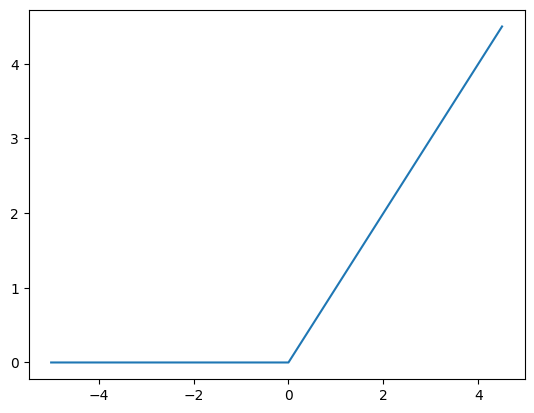

In [4]:
y_relu = ReLU()(x)
plt.plot(x, y_relu)

# ELU Activation Function (Exponential Linear Unit)

The Exponential Linear Unit (ELU) is designed to enhance neural network performance through improved activation dynamics. It integrates positive attributes from both linear and non-linear functions, aiming to overcome limitations observed in traditional activation functions like ReLU. Here are the key points revised:

Definition and Formula: ELU is expressed as 

α is a predefined constant that determines the saturation level for negative inputs.

- Enhanced Gradient Flow: By outputting negative values for negative inputs, ELU helps maintain active neuron states across a wider range of input values, promoting better gradient flow. This property is especially crucial for deep networks, where the depth can exacerbate the vanishing gradient problem.
- Addresses Vanishing Gradient Problem: The function’s design, with its exponential component for negative inputs, helps mitigate the vanishing gradient issue by ensuring that the gradient does not approach zero too rapidly. This facilitates more stable and effective training of deep learning models.
- Adaptation to Negative Inputs: The capability of ELU to produce negative outputs for negative inputs helps in keeping the mean activation closer to zero. This balance aids in reducing the bias shift during backpropagation, thus contributing to more stable network training dynamics.
- Weight Initialization Compatibility: Pairing ELU with suitable weight initialization methods, such as He initialization, is recommended to maximize its benefits. Proper initialization ensures that the network starts with activation distributions that complement ELU’s characteristics, fostering an environment conducive to efficient learning.

References:

[PyTorch ELU Documentation](https://pytorch.org/docs/stable/generated/torch.nn.ELU.html)

[Papers with Code: ELU Activation Function](https://paperswithcode.com/method/elu)

In [5]:
class Elu(nn.Module):
    def __init__(self):
        super().__init__()
        self.alpha = torch.tensor(1.0)

    def forward(self, x):
        return torch.where(x > 0, x, self.alpha * (torch.exp(x) - 1))

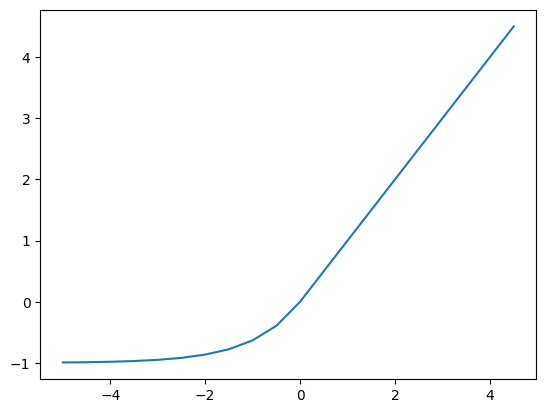

In [6]:
y_elu = Elu()(x).detach().numpy()
plt.plot(x, y_elu)

# SiLU Activation Function (Sigmoid-weighted Linear Unit)
The SiLU activation function, short for Sigmoid-weighted Linear Unit, is a smooth and non-monotonic activation function proposed as an alternative to traditional activation functions like ReLU and sigmoid. SiLU applies a sigmoid function to its input, effectively squashing it between 0 and 1, and then scales the input by this sigmoid output.

* SiLU is defined by the function f(x) = x * sigmoid(x), where sigmoid is the logistic sigmoid function.
* Combines the benefits of both ReLU and sigmoid activation functions, offering smoothness and non-linearity.
* SiLU is continuous and differentiable everywhere, facilitating better gradient flow during training and potentially accelerating convergence.
* Demonstrates effectiveness in various deep learning tasks, including image classification, object detection, and natural language processing.
* SiLU tends to produce more informative gradients compared to ReLU, which can lead to improved model generalization and performance.
* Implementation of SiLU is computationally efficient and supported in popular deep learning frameworks like PyTorch and TensorFlow.

References:

[SiLU](https://paperswithcode.com/method/silu)

In [7]:
class Silu(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return x * torch.sigmoid(x)

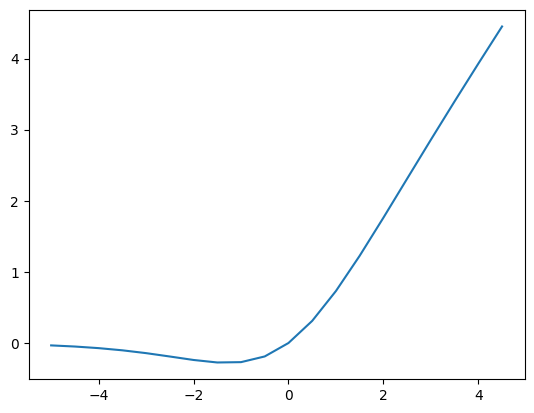

In [8]:
y_silu = Silu()(x)
plt.plot(x, y_silu)

# Swish Activation Function
The Swish activation function is a novel activation function proposed by researchers at Google in 2017. It is designed to combine the simplicity of ReLU with the smoothness of sigmoid-based activation functions.

* Swish is defined as f(x) = x * sigmoid(b*x), where sigmoid is the logistic sigmoid function.
* At b = 1, Swish reduces to the silu function, f(x) = x * sigmoid(x).
* The function exhibits non-monotonicity and smoothness, allowing for more robust gradient flow during backpropagation compared to ReLU.
* Swish activation has been shown to improve model performance across various tasks, including image classification, natural language processing, and recommendation systems.
* It tends to produce more informative gradients than ReLU, potentially leading to faster convergence and better generalization.
* Swish is computationally efficient and can be easily implemented using standard neural network libraries.
* While Swish has demonstrated promising results, its effectiveness may vary depending on the specific architecture and dataset.

References:

[Swish](https://paperswithcode.com/method/swish)

In [9]:
class Silu(nn.Module):
    def __init__(self, beta=1.0):
        super().__init__()
        self.beta = beta

    def forward(self, x):
        return x * torch.sigmoid(self.beta*x)

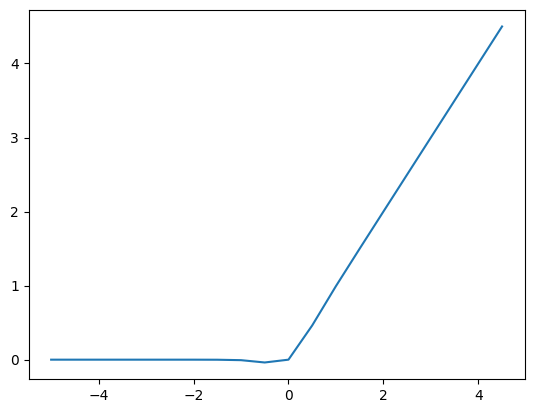

In [10]:
y_swish = Silu(beta=5.0)(x)
plt.plot(x, y_swish)

# GELU Activation Function (Gaussian Error Linear Unit)
The GELU activation function, short for Gaussian Error Linear Unit, is a smooth approximation of the ReLU function. Introduced as an activation function in neural networks.

* Smooth approximation of ReLU, aiding in better gradient flow during training.
* Defined by a sigmoid-like function applied to the input tensor.
* Demonstrates effectiveness in various neural network architectures.
* Useful for tasks where smoothness in the activation function is desired.
* Implementation is computationally efficient and widely supported in deep learning frameworks.
* The GELU activation function provides a valuable alternative to ReLU and other activation functions, offering improved performance in certain scenarios while maintaining simplicity and ease of use.

References:

[Gaussian Error Linear Units](https://paperswithcode.com/method/gelu)

In [11]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        # can also be appoximated by glue = x * torch.sigmoid(1.702 * x) or F.gelu(x)
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2 / torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

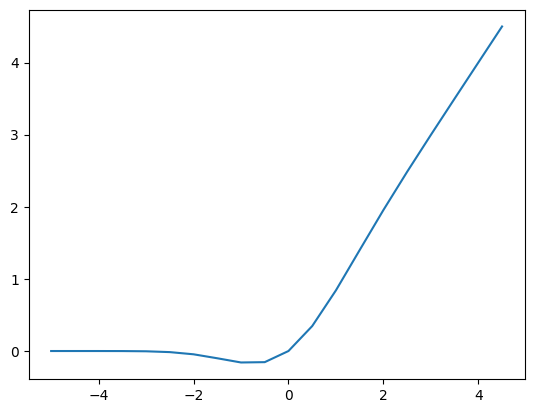

In [12]:
y_gelu = GELU()(x).detach().numpy()
plt.plot(x, y_gelu)

# GLU Activation Function (Gated Linear Unit)
The Gated Linear Unit (GLU) activation function is a type of activation function that operates by gating the input through a sigmoid function. It was introduced as part of the gated convolutional network architecture by Dauphin et al. in 2016.

* GLU activation involves gating the input tensor through a sigmoid function, effectively controlling the flow of information.
* It facilitates the selective filtering of information, allowing the model to focus on relevant features while suppressing noise.
* GLU has been shown to be effective in various deep learning architectures, particularly in tasks involving sequential data processing, such as natural language processing and time-series prediction.
* The activation function's gating mechanism helps mitigate the vanishing gradient problem commonly encountered in deep neural networks, leading to more stable training dynamics.
* While GLU offers benefits in certain scenarios, its performance may vary depending on the specific task and dataset.
* Implementation of GLU is straightforward and can be easily integrated into existing neural network architectures.

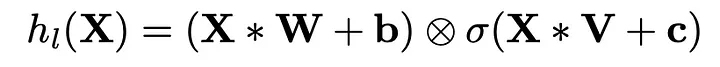

References:
[GLU: Gated Linear Unit implementation](https://medium.com/deeplearningmadeeasy/glu-gated-linear-unit-21e71cd52081)

In [13]:
class GLU(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.projection = nn.Linear(input_size, input_size)  # W
        self.gate = nn.Linear(input_size, input_size)  # V

    def forward(self, x):
        # Compute the linear transformation: xW
        projection_output = self.projection(x)
        # Compute the gate operation: sigmoid(xV)
        gate_output = torch.sigmoid(self.gate(x))
        # GLU(x, W, V, b, c) = xW ⊗ sigmoid(xV)
        return projection_output * gate_output

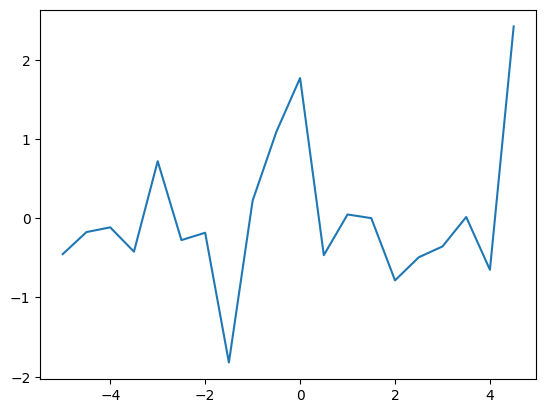

In [14]:
y_glu = GLU(input_size=20)(x).detach().numpy()
plt.plot(x, y_glu)

# SwiGLU Activation Function (Swish-Gated Linear Unit)
The SwiGLU activation function, or Swish-Gated Linear Unit, combines the Swish activation function with a gating mechanism.

* Combines Swish with a gating mechanism: SwiGLU enhances the traditional Swish activation function by introducing a gating mechanism that modulates the output.
* Smooth and non-monotonic: Similar to Swish, SwiGLU is smooth and non-monotonic, facilitating gradient flow during training.
* Outperforms ReLU, Swish, and GELU: Experimental results have shown that SwiGLU can outperform other activation functions such as ReLU, Swish, and GELU in certain tasks.
* Effectiveness varies based on architecture and dataset: The effectiveness of SwiGLU can depend on the specific neural network architecture and dataset, so it may not always be the best choice for every application.

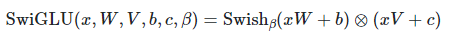

references:

[Coding LLaMA 2 from scratch in PyTorch - KV Cache, Grouped Query Attention, Rotary PE, RMSNorm](https://www.youtube.com/watch?v=oM4VmoabDAI&ab_channel=UmarJamil)
[LLaMA](https://vinija.ai/models/LLaMA/)

[SwiGLU](https://paperswithcode.com/method/swiglu)

In [15]:
class SwiGLU(nn.Module):
    def __init__(self, in_size):
        super().__init__()
        self.projection = nn.Linear(in_size, in_size)
        self.gate = nn.Linear(in_size, in_size)
        self.swish = Silu(beta=1.0)

    def forward(self, x):
        # Swishβ(xW + b)
        gate_output = self.swish(self.gate(x))
        # xV + c
        projection_output = self.projection(x)
        # xV + c * Swishβ(xW + b)
        return gate_output * projection_output

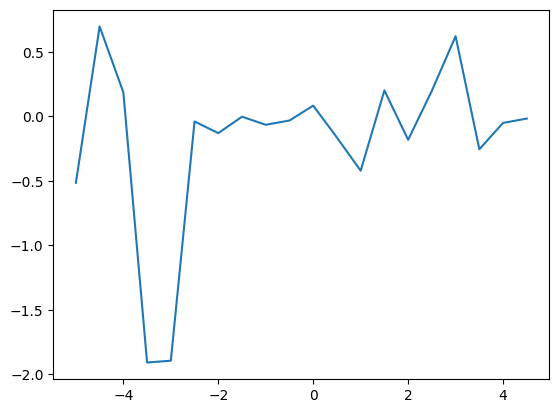

In [16]:
y_swiglu = SwiGLU(in_size=20)(x).detach().numpy()
plt.plot(x, y_swiglu)

### GeGLU Activation Function (Gated Exponential Linear Unit)
The GeGLU activation function, short for Gated Exponential Linear Unit, is a variation of the GELU activation function introduced to enhance the gating mechanism and improve model performance. GeGLU operates by combining the GELU activation of the input tensor with a gated linear transformation.

* GeGLU is defined by the function GEGLU(x, W, V, b, c) = GELU(xW + b) ⊗ (xV + c), where GELU represents the Gaussian Error Linear Unit activation function.
* The activation function incorporates a gating mechanism that controls the flow of information through the network, allowing for selective feature extraction and noise suppression.
* GeGLU has demonstrated effectiveness in various deep learning tasks, including image classification, language modeling, and sequence generation.
* By leveraging both the smoothness of GELU and the gating mechanism, GeGLU enhances gradient flow during training and promotes faster convergence.
* Implementation of GeGLU is feasible using standard neural network libraries, and its computational efficiency enables seamless integration into existing architectures.
* While GeGLU offers promising results, its performance may vary depending on the specific characteristics of the dataset and the complexity of the task at hand.

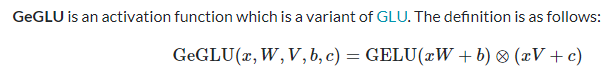

References:

[Gemma: Open Models Based on Gemini
Research and Technology](https://storage.googleapis.com/deepmind-media/gemma/gemma-report.pdf)

[GLU Variants Improve Transformer](https://arxiv.org/abs/2002.05202)

[GeGLU](https://paperswithcode.com/method/geglu)

In [17]:
class GeGLU(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.projection = nn.Linear(input_size, input_size)  # W

    def forward(self, x):
        # xV + c
        projection_output = self.projection(x)
        # Compute GELU activation: approximated by F.gelu(x) = x * sigmoid(1.702 * x)
        gate_output = F.gelu(x)

        # GeGLU(x, W, V, b, c) = GELU(x) ⊗ (xV + c)
        return gate_output * projection_output

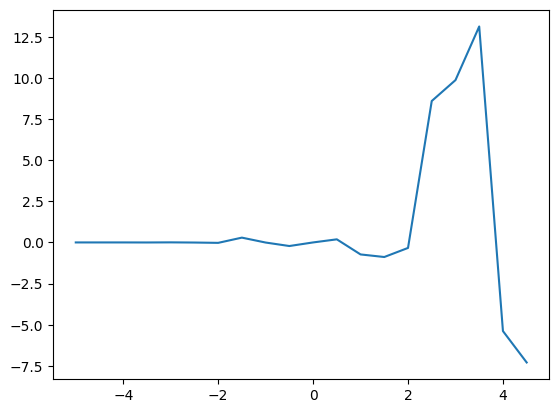

In [18]:
y_geglu = GeGLU(input_size=20)(x).detach().numpy()
plt.plot(x, y_geglu)

# Plotting all the activation functions

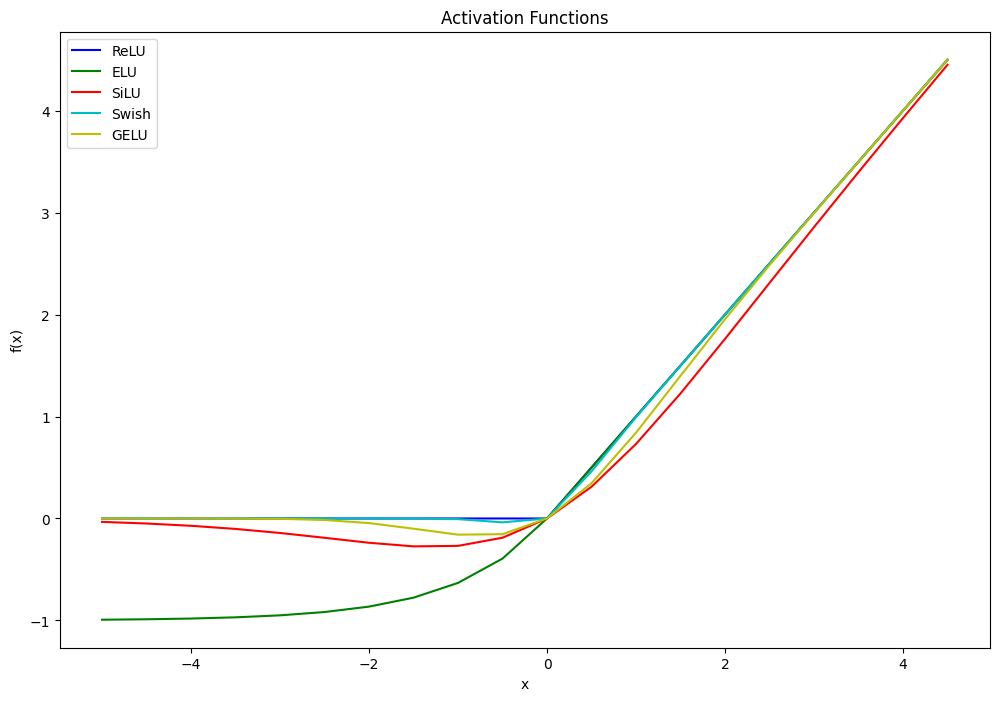

In [19]:
# plotting all the nice activation functions
plt.figure(figsize=(12, 8))
plt.plot(x, y_relu, label='ReLU', color='b')
plt.plot(x, y_elu, label='ELU', color='g')
plt.plot(x, y_silu, label='SiLU', color='r')
plt.plot(x, y_swish, label='Swish', color='c')
plt.plot(x, y_gelu, label='GELU', color='y')
#plt.plot(x, y_glu, label='GLU', color='m')
#plt.plot(x, y_swiglu, label='SwiGLU', color='k')
#plt.plot(x, y_geglu, label='GeGLU', color='orange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Activation Functions')
plt.legend()

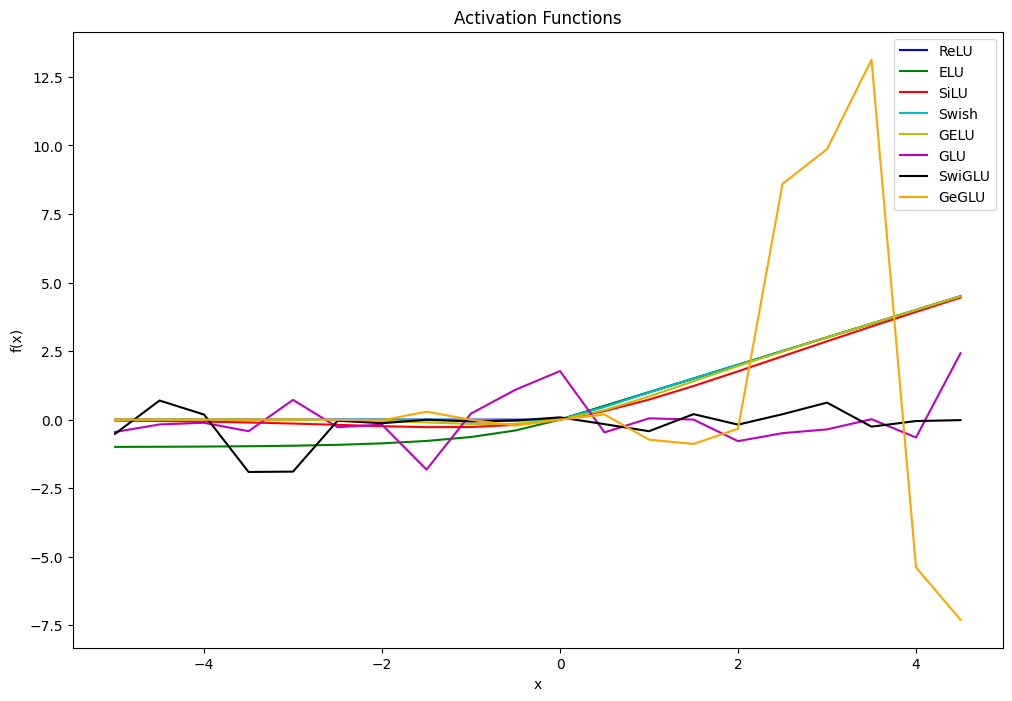

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(x, y_relu, label='ReLU', color='b')
plt.plot(x, y_elu, label='ELU', color='g')
plt.plot(x, y_silu, label='SiLU', color='r')
plt.plot(x, y_swish, label='Swish', color='c')
plt.plot(x, y_gelu, label='GELU', color='y')
plt.plot(x, y_glu, label='GLU', color='m')
plt.plot(x, y_swiglu, label='SwiGLU', color='k')
plt.plot(x, y_geglu, label='GeGLU', color='orange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Activation Functions')
plt.legend()